In [1]:
import awkward as ak
import pickle
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dilk4sii because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Unphysical dataset 1.2- 3.6 GeV

In [57]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                "jetPt": ak.flatten(events.jetPt),
                # "jetE": ak.flatten(events.jetE),
                # "jetadR":ak.flatten(events.jetadR),
                # "TaudR":ak.flatten(events.TaudR),
                # "Tau1dR":ak.flatten(events.Tau1dR),
                # "Tau2dR":ak.flatten(events.Tau2dR),
                "a_m": ak.flatten(events.a_m),
                "a_pt": ak.flatten(events.a_pt),
                # "a_eta":ak.flatten(events.a_eta),
                # "a_phi":ak.flatten(events.a_phi),
                "Tau1pT":ak.flatten(events.Tau1pT),
                "Tau2pT":ak.flatten(events.Tau2pT),
                # "NrecoTaus": ak.flatten(events.NrecoTaus),
                # "NGenTaus": ak.flatten(events.NGenTaus),
                # "recoTau1dR": ak.flatten(events.recoTau1dR),
                # "recoTau2dR": ak.flatten(events.recoTau2dR),
                # "n1dR": ak.flatten(events.n1dR),
                # "n2dR": ak.flatten(events.n2dR),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        amass = jet.a_m[jet.a_m > -22.22]
        # amass = amass[(amass==14)]
        mask = (amass>13.9) & (amass<14.1)
        amass = amass[mask]
        jetmass = jet.jetM[jet.jetM > -22.22]
        jetmass = jetmass[mask]
        jetpt = jet.jetPt[jet.jetPt>-22.22]
        jetpt = jetpt[mask]
        apt = jet.a_pt[jet.a_pt>-22.22]
        apt = apt[mask]
        # aeta = jet.a_eta[jet.a_eta>-22.22]
        # aphi = jet.a_phi[jet.a_phi>-22.22]
        tau1pt = jet.Tau1pT[jet.Tau1pT>-22.22]
        tau1pt = tau1pt[mask]
        tau2pt = jet.Tau2pT[jet.Tau2pT>-22.22]
        tau2pt = tau2pt[mask]
        # recotau1dr = jet.recoTau1dR[jet.recoTau1dR>-22.22]
        # recotau2dr = jet.recoTau2dR[jet.recoTau2dR>-22.22]
        # n1dr = jet.n1dR[jet.n1dR>-22.22]
        # n2dr = jet.n2dR[jet.n2dR>-22.22]
        # tau1dr = jet.Tau1dR[jet.Tau1dR>-22.22]
        # tau2dr = jet.Tau2dR[jet.Tau2dR>-22.22]
        # taudr = jet.TaudR[jet.TaudR>-22.22]
        # adr = jet.jetadR[jet.jetadR>-22.22]
        # gentau = jet.NGenTaus[jet.NGenTaus > -22.22]
        # recotau = jet.NrecoTaus[jet.NrecoTaus > -22.22]
        
        # Jet mass -----------------------------------------------------------

        jet_mass = (
            hist.Hist.new
            .StrCat(["jet mass"], name="hmassjet")
            .Reg(54, 0, 20, name="massjet", label="Mass [GeV]")
            .Int64()
        )
        jet_mass.fill(hmassjet="jet mass", massjet=jetmass)
        
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(42, 3.6,18, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)

        # JET PT -----------------------------------------------------------
        
        jet_pt = (
            hist.Hist.new
            .StrCat(["jet_pt"], name="hjetpt")
            .Reg(229, 0, 300, name="pt_jet", label="pT [GeV]")
            .Int64()
        )
        
        jet_pt.fill(hjetpt="jet_pt", pt_jet=jetpt)

        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(56, 30, 300, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(199, 0, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(199, 0, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
#         # A eta -----------------------------------------------------------
        
#         A_eta = (
#             hist.Hist.new
#             .StrCat([ "A_ata"], name="haeta")
#             .Reg(10, -5, 5, name="eta_a", label="eta")
#             .Int64()
#         )
        
#         A_eta.fill(haeta="A_eta", eta_a=aeta)
       
#         # A phi -----------------------------------------------------------
#         A_phi = (
#             hist.Hist.new
#             .StrCat([ "A_phi"], name="haphi")
#             .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
#             .Int64()
#         )
        
#         A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # a nad jet dR -----------------------------------------------------------
        
        
#         a_jet_dR = (
#             hist.Hist.new
#             .StrCat(["a_jet_dR"], name="hajetdR")
#             .Reg(10, 0.0, 0.5, name="ajetdr", label="dR")
#             .Int64()
#         )
#         a_jet_dR.fill(hajetdR="a_jet_dR", ajetdr=adr)
        
#         # gen tau1 jet dR -----------------------------------------------------------
        
#         tau1_jet_dR = (
#             hist.Hist.new
#             .StrCat(["tau1_dr"], name="htau1jetdR")
#             .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
#             .Int64()
#         )
#         tau1_jet_dR.fill(htau1jetdR="tau1_dr", tau1jetdr=tau1dr)
        
#         # gen tau2 jet dR -----------------------------------------------------------
        
#         tau2_jet_dR = (
#             hist.Hist.new
#             .StrCat(["tau2_dr"], name="htau2jetdR")
#             .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
#             .Int64()
#         )
#         tau2_jet_dR.fill(htau2jetdR="tau2_dr", tau2jetdr=tau2dr)
        
                
#         # reco tau1 jet dR -----------------------------------------------------------
        
#         recotau1_jet_dR = (
#             hist.Hist.new
#             .StrCat(["recotau1_dr"], name="hrecotau1jetdR")
#             .Reg(10, 0.0, 0.5, name="recotau1jetdr", label="dR")
#             .Int64()
#         )
#         recotau1_jet_dR.fill(hrecotau1jetdR="recotau1_dr", recotau1jetdr=recotau1dr)
        
#        # reco tau2 jet dR -----------------------------------------------------------
        
#         recotau2_jet_dR = (
#             hist.Hist.new
#             .StrCat(["recotau2_dr"], name="hrecotau2jetdR")
#             .Reg(10, 0.0, 0.5, name="recotau2jetdr", label="dR")
#             .Int64()
#         )
#         recotau2_jet_dR.fill(hrecotau2jetdR="recotau2_dr", recotau2jetdr=recotau2dr)
        
#         #gen tau1 tau2 dR -----------------------------------------------------------
        
#         taus_dR = (
#             hist.Hist.new
#             .StrCat(["taus_dr"], name="htausdR")
#             .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
#             .Int64()
#         )
#         taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        
        
        
        
#         # number of gen taus -----------------------------------------------------------
        
#         gen_Tau = (
#                     hist.Hist.new
#                     .StrCat(["gen_tau"], name="hgentau")
#                     .Reg(5, 0, 5., name="gtau", label="Number of Tau")
#                     .Int64()
#                 )
#         gen_Tau.fill(hgentau="gen_tau", gtau=gentau)
            
            
#         # number of reco taus -----------------------------------------------------------
        
#         reco_Tau = (
#                     hist.Hist.new
#                     .StrCat(["reco_tau"], name="hrecotau")
#                     .Reg(5, 0, 5., name="rtau", label="Number of Tau")
#                     .Int64()
#                 )
#         reco_Tau.fill(hrecotau="reco_tau", rtau=recotau)
        
#         #A maas and pT plot----------------------------------------------------------------------------------
#         A_mass_pt = (
#             hist.Hist.new
            
#             .Reg(8, 1.2, 3.6, name="massa", label="Mass [GeV]")
#             .Reg(56, 30, 300, name="pt_a", label="pT [GeV]").Int64()
#         )
#         A_mass_pt.fill(massa=amass, pt_a=apt)
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "jet_mass":jet_mass,
                "a_mass":A_mass,
                "jet_pt":jet_pt,
                "a_pt":A_pt,
                "tau1_pt":Tau1_pt,
                "tau2_pt":Tau2_pt,
                # "a_eta":A_eta,
                # "a_phi":A_phi,
                # "tau1_jet_dr":tau1_jet_dR,
                # "tau2_jet_dr":tau2_jet_dR,
                # "taus_dr":taus_dR,
                # "a_jet_dr":a_jet_dR,
                # "recotau1_jet_dr":recotau1_jet_dR,
                # "recotau2_jet_dr":recotau2_jet_dR,
                # "number_gen_tau":gen_Tau,
                # "number_reco_tau":reco_Tau,
                # "a_mass_pt":A_mass_pt,
               
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [58]:
# with open("ATo2Tau_m1p2To3p6_pt30To300_0000.json", "r") as fin:
#     file_list_train_0 = json.load(fin)
with open("ATo2Tau_m3p6To18_pt30To300_0001.json", "r") as fin:
    file_list_train_1 = json.load(fin)   
    
             
fileset = {
    # 'train_mass_unphy_0': file_list_train_0 
    'train_mass_phy_1': file_list_train_1 
                  
}
# fileset

In [59]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=4),
    schema=BaseSchema,
    # maxchunks=100,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor()
)
# out

# Save the 'out' object to a file
with open('ATo2Tau_m3p6To18_pt30To300_0001_only_14GeV.pkl', 'wb') as f:
    pickle.dump(out, f)

print("Output saved to 'ATo2Tau_m3p6To18_pt30To300_0001_only_14GeV.pkl'")

Output()

Output saved to 'ATo2Tau_m3p6To18_pt30To300_0001_only_14GeV.pkl'


{'train_mass_phy_1': {'entries': 295180, 'jet_mass': Hist(
  StrCategory(['jet mass'], name='hmassjet'),
  Regular(54, 0, 20, name='massjet', label='Mass [GeV]'),
  storage=Int64()) # Sum: 5214.0 (7588.0 with flow), 'a_mass': Hist(
  StrCategory(['A mass'], name='hmassa'),
  Regular(42, 3.6, 18, name='massa', label='Mass [GeV]'),
  storage=Int64()) # Sum: 7588.0, 'jet_pt': Hist(
  StrCategory(['jet_pt'], name='hjetpt'),
  Regular(229, 0, 300, name='pt_jet', label='pT [GeV]'),
  storage=Int64()) # Sum: 7578.0 (7588.0 with flow), 'a_pt': Hist(
  StrCategory(['A_pt'], name='hapt'),
  Regular(56, 30, 300, name='pt_a', label='pT [GeV]'),
  storage=Int64()) # Sum: 7588.0, 'tau1_pt': Hist(
  StrCategory(['Tau1_pt'], name='htau1pt'),
  Regular(199, 0, 200, name='pt_tau1', label='pT [GeV]'),
  storage=Int64()) # Sum: 6637.0 (7588.0 with flow), 'tau2_pt': Hist(
  StrCategory(['Tau2_pt'], name='htau2pt'),
  Regular(199, 0, 200, name='pt_tau2', label='pT [GeV]'),
  storage=Int64()) # Sum: 7588.0}}

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

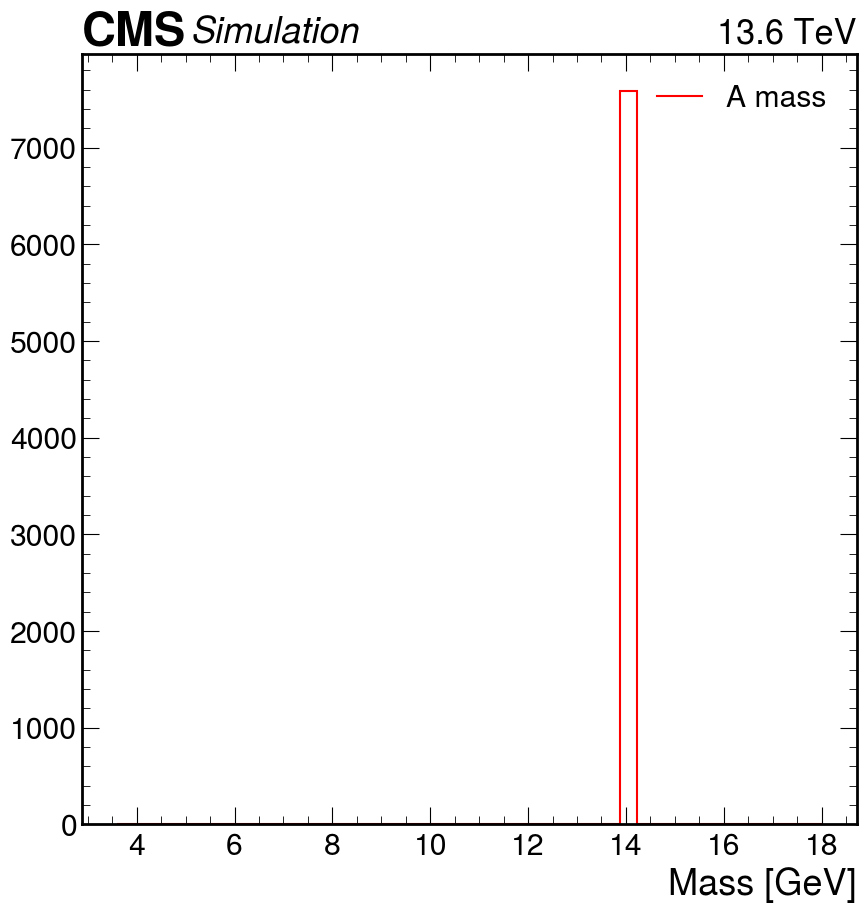

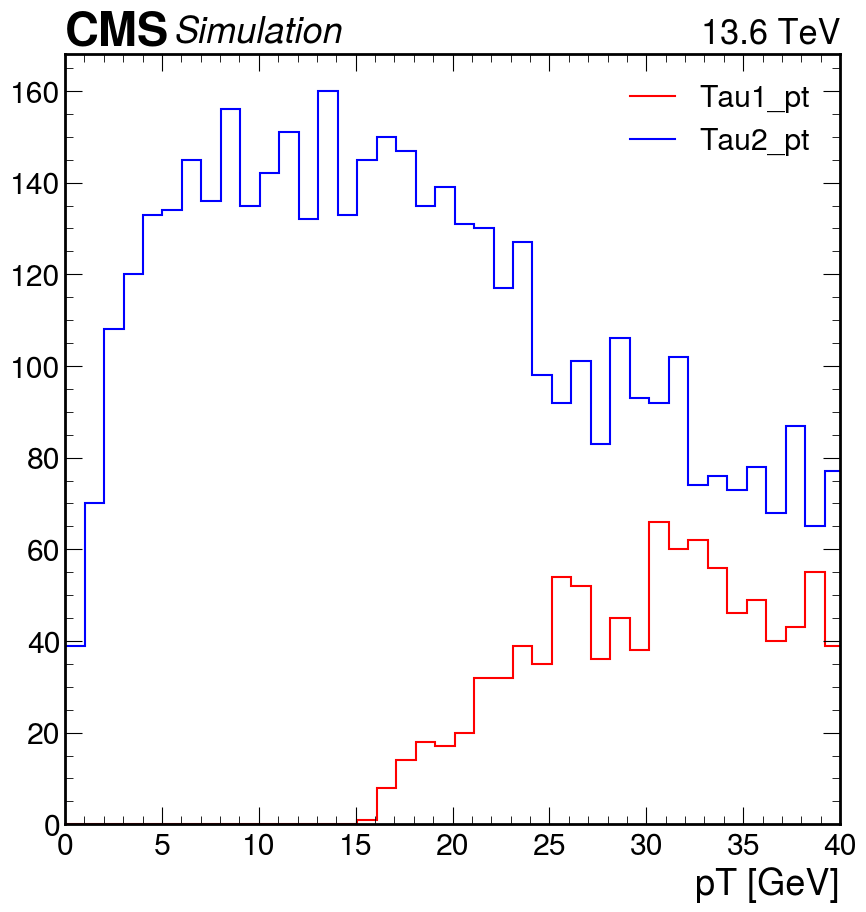

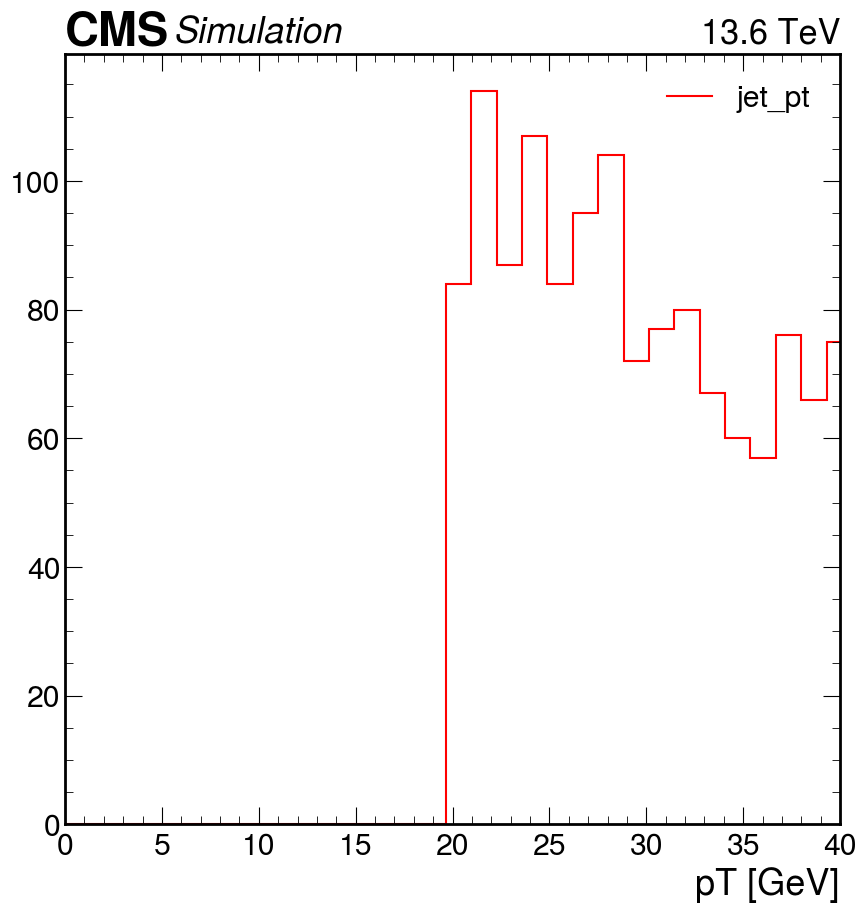

In [61]:
with open('ATo2Tau_m3p6To18_pt30To300_0001_only_14GeV.pkl', 'rb') as f:
    out = pickle.load(f)

print(out)
fig, ax = plt.subplots()
out["train_mass_phy_1"]["a_mass"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass_phy_1"]["Tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend()
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)

fig, ax = plt.subplots()
out["train_mass_phy_1"]["tau1_pt"].plot1d(ax=ax,histtype='step',color="r")
out["train_mass_phy_1"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# ax.set_yscale("log")
ax.legend()
ax.set_xlim(0, 40)
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)

fig, ax = plt.subplots()
out["train_mass_phy_1"]["jet_pt"].plot1d(ax=ax,histtype='step',color="r")
# ax.set_yscale("log")
ax.legend()
ax.set_xlim(0, 40)
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)

In [60]:
# fig, ax = plt.subplots()
# out["train_mass"]["tau1_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# # ax.set_yscale("log")
# ax.legend(title="pT Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [61]:
# fig, ax = plt.subplots()
# out["train_mass"]["a_mass"].plot1d(ax=ax,histtype='step',color='b')
# out["train_mass"]["jet_mass"].plot1d(ax=ax,histtype='step', color='r')
# # ax.set_yscale("log")
# ax.legend(title="Mass Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [62]:
# fig, ax = plt.subplots()
# out["train_mass"]["a_mass"].plot1d(ax=ax)
# ax.set_yscale("log")
# ax.legend(title="Mass Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)